#Задача 1.
Для выполнения задачи будет использован csv файл “vgsale_1”, содержащий данные о видеоиграх, выпущенных с 1980 по 2020 гг. Каждое из наблюдений в файле имеет 10 характеристик:

* Name – название игры,
* Platform – игровая платформа (PC, PSP, X360 и др.),
* Year – год выпуска игры,
* Genre – жанр игры,
* Publisher – издатель игры,
* NA_Sales – продажи в Северной Америке (в миллионах),
* EU_Sales – продажи в Европе (в миллионах),
* JP_Sales – продажи в Японии (в миллионах),
* Other_Sales – продажи в остальных странах мира (в миллионах),
* Global_Sales – объем продаж по всему миру.

Загрузите файл «vgsales_1.csv» в объект DataFrame, рассчитайте необходимые показатели и визуализируйте информацию, используя функции любой библиотеки для визуализации данных.

**Задание:**

1. Ответь на вопрос: игры каких жанров были наиболее популярны до 2000 года, а какие после?
2. Оцени популярность жанров по количеству выпущенных игр и по объему продаж по всему миру. Для визуализации полученных результатов используй столбчатые диаграммы.


**Примечание.** Одна и та же игра может встречаться в выборке несколько раз, т.к. она может быть выпущена на нескольких платформах.
1. Отобрази на графике общее число видеоигр, выпущенных в каждом году.
2. Определи трех издателей, выпустивших наибольшее количество видеоигр.
3. Изобрази количество выпущенных издателями видеоигр для каждой платформы на столбчатой диаграмме (можно использовать диаграмму с накоплением).
Отобрази на круговых диаграммах доли суммарного объема продаж с 1980 г. до 2000 г. и с 2000 г. до 2020 г. в Северной Америке, Европе, Японии (также для построения корректных диаграмм используйте столбец “Other Sales”) от объема продаж по всему миру.

In [3]:
# Загрузим все необходимые библиотеки
import os
import numpy as np
import pandas as pd

import plotly as py
import plotly.io as pio
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import matplotlib.pyplot as plt



In [4]:
from google.colab import files

uploaded = files.upload()



Saving vgsale_1.csv to vgsale_1.csv


In [5]:
df =  pd.read_csv('vgsale_1.csv')

In [4]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [5]:
df_2000_less = df[df['Year'] <= 2000][['Genre', 'Global_Sales']]
df_2000_greater = df[df['Year'] > 2000][['Genre', 'Global_Sales']]
df_1 = df_2000_less.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).reset_index()
df_2 = df_2000_greater.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).reset_index()
print(df_1, df_2)

           Genre  Global_Sales
0       Platform        347.24
1   Role-Playing        228.80
2         Action        224.51
3         Sports        220.04
4         Racing        182.49
5       Fighting        150.91
6        Shooter        135.55
7         Puzzle        105.54
8           Misc         87.53
9       Strategy         65.93
10    Simulation         55.94
11     Adventure         52.57            Genre  Global_Sales
0         Action       1498.37
1         Sports       1089.20
2        Shooter        890.65
3           Misc        710.09
4   Role-Playing        695.04
5         Racing        544.28
6       Platform        481.91
7     Simulation        334.22
8       Fighting        293.14
9      Adventure        182.23
10        Puzzle        136.68
11      Strategy        107.50


**1) Игры каких жанров были наиболее популярны до 2000 года, а какие после?**

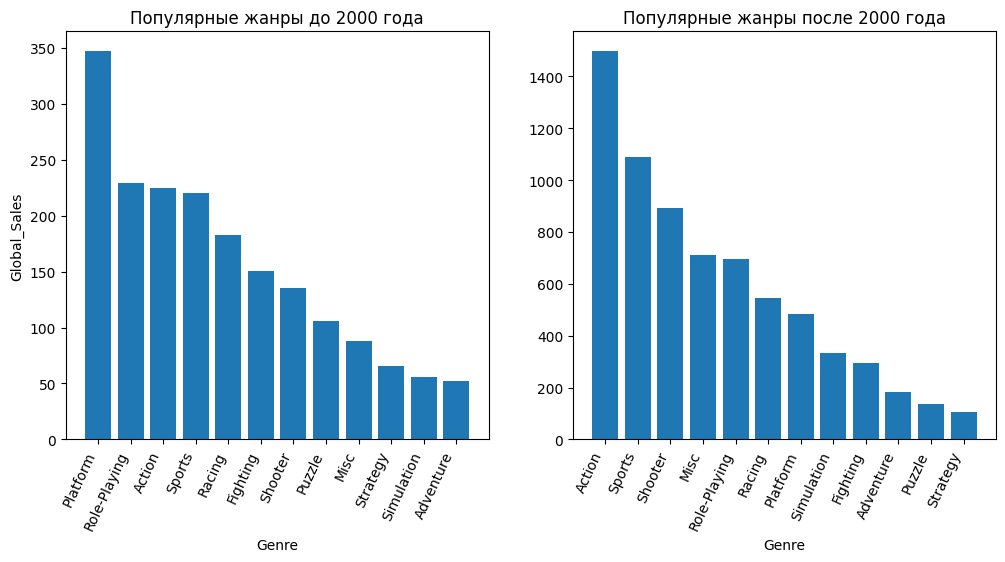

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2)    # Создание одной фигуры и двух осей
fig.set_size_inches(12, 6)
ax1.bar(df_1['Genre'], df_1['Global_Sales'])        # График Y(X) на первой оси
ax1.set_xlabel('Genre')                     # Метка оси x первой оси
ax1.set_ylabel('Global_Sales')                     # Метка оси y первой оси
ax1.set_title("Популярные жанры до 2000 года")                   # Установка заголовка первой оси
#ax1.legend(['Y(X)'])                    # Установка легенды первой оси
ax2.bar(df_2['Genre'], df_2['Global_Sales'])      # Построение второй оси
ax2.set_xlabel('Genre')                     # Установка метки x для второй оси
ax2.set_title("Популярные жанры после 2000 года")                  # Установка заголовка для второй оси
#ax2.legend(['Y2(X)'])                   # Установка легенды для второй оси
fig.autofmt_xdate(rotation=65)          # Поворот меток X
plt.show()

**Вывод:**


---


**До 2020:** популярны жанры - Platform, Role_Playing, Action, Sports, Racing

**После 2020:** популярны жанры - Action, Sports, Shooter, Misc, Role-Playing


In [7]:
df_genre_name = df.groupby('Genre')['Name'].count().reset_index()
df_genre_name.sort_values('Name', ascending=False).reset_index()
df_genre_sales = df.groupby('Genre')['Global_Sales'].sum().reset_index()
df_genre_sales = df_genre_sales.sort_values('Global_Sales', ascending=False).reset_index().drop(['index'], axis = 1)
df_genre_sales

,Genre,Global_Sales
0,Action,1751.18
1,Sports,1330.93
2,Shooter,1037.37
3,Role-Playing,927.37
4,Platform,831.37
5,Misc,809.96
6,Racing,732.04
7,Fighting,448.91
8,Simulation,392.20
9,Puzzle,244.95


In [8]:
df_genre_name = df_genre_name.sort_values('Name', ascending=False)

In [9]:
df_genre_name

,Genre,Name
0,Action,3316
10,Sports,2346
3,Misc,1739
7,Role-Playing,1488
8,Shooter,1310
1,Adventure,1286
6,Racing,1249
4,Platform,886
9,Simulation,867
2,Fighting,848


**2) Оцени популярность жанров по количеству выпущенных игр и по объему продаж по всему миру. Для визуализации полученных результатов используй столбчатые диаграммы.**

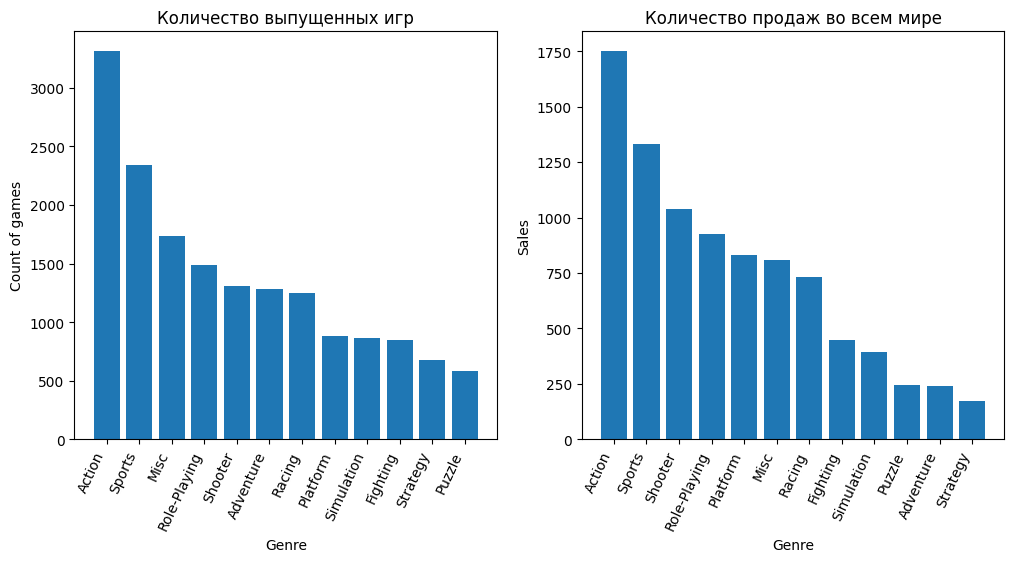

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2)    # Создание одной фигуры и двух осей
fig.set_size_inches(12, 6)
ax1.bar(df_genre_name['Genre'], df_genre_name['Name'])        # График Y(X) на первой оси
ax1.set_xlabel('Genre')                     # Метка оси x первой оси
ax1.set_ylabel('Count of games')                     # Метка оси y первой оси
ax1.set_title("Количество выпущенных игр")                   # Установка заголовка первой оси
#ax1.legend(['Y(X)'])                    # Установка легенды первой оси
ax2.bar(df_genre_sales['Genre'], df_genre_sales['Global_Sales'])      # Построение второй оси
ax2.set_xlabel('Genre')
ax2.set_ylabel('Sales')                     # Установка метки x для второй оси
ax2.set_title("Количество продаж во всем мире")                  # Установка заголовка для второй оси
#ax2.legend(['Y2(X)'])                   # Установка легенды для второй оси
fig.autofmt_xdate(rotation=65)          # Поворот меток X
plt.show()

**Вывод:**

---

1) В количестве выпущенных игр популярны следующие жанры: Action, Sports, Misc

2) В количестве продаж во всем мире популярны следующие жанры: Action, Sports, Shooter



**Общее число видеоигр, выпущенных в каждом году:**

In [11]:
df_year_game = df.groupby('Year')['Name'].count().reset_index()
df_year_game = df_year_game.rename(columns = {'Name': 'Count of games'})
fig = px.line(df_year_game, x='Year', y='Count of games', title='Чило видеоигр, выпущенных в каждом году')
fig.show()

**Три издателя, выпустивших наибольшее количество видеоигр:**

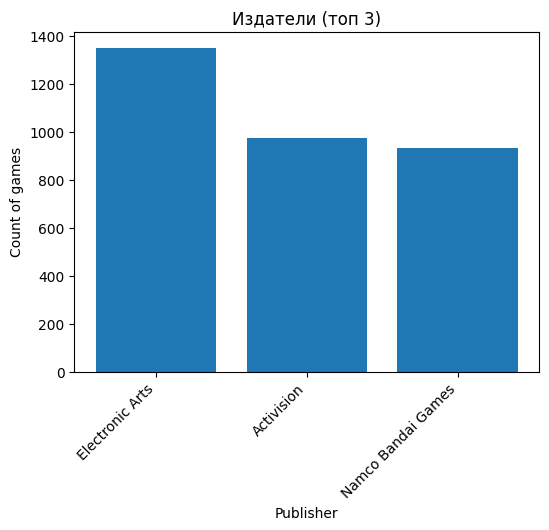

In [12]:
df_publisher = df.groupby('Publisher')['Name'].count().reset_index().sort_values('Name', ascending=False).reset_index().drop(['index'], axis = 1)
df_publisher = df_publisher.rename(columns = {'Name': 'Count of games'})
fig, ax1 = plt.subplots()    # Создание одной фигуры и двух осей
fig.set_size_inches(6, 5)
ax1.bar(df_publisher.head(3)['Publisher'], df_publisher.head(3)['Count of games'])        # График Y(X) на первой оси
ax1.set_xlabel('Publisher')                     # Метка оси x первой оси
ax1.set_ylabel('Count of games')                     # Метка оси y первой оси
ax1.set_title("Издатели (топ 3)")                   # Установка заголовка первой оси

fig.autofmt_xdate(rotation=45)          # Поворот меток X
plt.show()

**Количество выпущенных издателями видеоигр для каждой платформы на столбчатой диаграмме (можно использовать диаграмму с накоплением).**

In [19]:
df_platforms = df['Platform'].value_counts().reset_index()
df_platforms

,Platform,count
0,DS,2163
1,PS2,2161
2,PS3,1329
3,Wii,1325
4,X360,1265
5,PSP,1213
6,PS,1196
7,PC,960
8,XB,824
9,GBA,822


In [31]:
df_3 = df.groupby(['Platform', 'Publisher'])['Name'].count().reset_index().sort_values(['Publisher', 'Name'], ascending=False)
df_3

,Platform,Publisher,Name
986,PS2,responDESIGN,1
1760,XB,responDESIGN,1
109,3DS,"mixi, Inc",1
662,PC,inXile Entertainment,1
108,3DS,imageepoch Inc.,2
...,...,...,...
534,PC,2D Boy,1
0,2600,20th Century Fox Video Games,5
533,PC,1C Company,3
125,DS,10TACLE Studios,2


In [41]:
for i in range(len(df_platforms)):
    fig = go.Figure()

    platform = df_platforms['Platform'].iloc[i]
    x = df_3[df_3['Platform'] == platform]['Publisher']
    y = df_3[df_3['Platform'] == platform]['Name']

    fig.add_trace(go.Bar(x=x, y=y, marker_color='blue'))

    # Добавляем названия осей и графика
    fig.update_layout(
        title=f'График для платформы: {platform}',  # Название графика
        xaxis_title='Издатель',  # Название оси X
        yaxis_title='Количество выпущенных игр',  # Название оси Y
        showlegend=False
    )

    fig.show()

**Отобразить на круговых диаграммах доли суммарного объема продаж с 1980 г. до 2000 г. и с 2000 г. до 2020 г. в Северной Америке, Европе, Японии (также для построения корректных диаграмм используйте столбец “Other Sales”) от объема продаж по всему миру**

In [50]:
df[(df['Year'] >= 1980) & (df['Year'] <= 2000)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10
...,...,...,...,...,...,...,...,...,...,...
16506,Samurai Shodown: Warrios Rage,PS,1999.0,Fighting,SNK,0.01,0.00,0.00,0.00,0.01
16518,Crossroad Crisis,PS,2000.0,Puzzle,Success,0.01,0.00,0.00,0.00,0.01
16554,Psychic Detective,PS,1995.0,Adventure,Electronic Arts,0.01,0.00,0.00,0.00,0.01
16579,PGA European Tour,N64,2000.0,Sports,Infogrames,0.01,0.00,0.00,0.00,0.01


In [53]:
NA = df[(df['Year'] >= 1980) & (df['Year'] <= 2000)]['NA_Sales'].sum()/df[(df['Year'] >= 1980) & (df['Year'] <= 2000)]['Global_Sales'].sum() * 100
EU = df[(df['Year'] >= 1980) & (df['Year'] <= 2000)]['EU_Sales'].sum()/df[(df['Year'] >= 1980) & (df['Year'] <= 2000)]['Global_Sales'].sum() * 100
JP = df[(df['Year'] >= 1980) & (df['Year'] <= 2000)]['JP_Sales'].sum()/df[(df['Year'] >= 1980) & (df['Year'] <= 2000)]['Global_Sales'].sum() * 100
Other = df[(df['Year'] >= 1980) & (df['Year'] <= 2000)]['Other_Sales'].sum()/df[(df['Year'] >= 1980) & (df['Year'] <= 2000)]['Global_Sales'].sum() * 100


labels = ['NA', 'EU', 'JP', 'Other']
sizes = [NA, EU, JP, Other]  # Проценты для каждого сегмента

# Создание диаграммы
fig = go.Figure(data=[go.Pie(labels=labels, values=sizes)])
# Добавление заголовка
fig.update_layout(title_text='Относительные продажи (1980 - 2000 гг)')

NA2 = df[(df['Year'] >= 2000) & (df['Year'] <= 2020)]['NA_Sales'].sum()/df[(df['Year'] >= 2000) & (df['Year'] <= 2020)]['Global_Sales'].sum() * 100
EU2 = df[(df['Year'] >= 2000) & (df['Year'] <= 2020)]['EU_Sales'].sum()/df[(df['Year'] >= 2000) & (df['Year'] <= 2020)]['Global_Sales'].sum() * 100
JP2 = df[(df['Year'] >= 2000) & (df['Year'] <= 2020)]['JP_Sales'].sum()/df[(df['Year'] >= 2000) & (df['Year'] <= 2020)]['Global_Sales'].sum() * 100
Other2 = df[(df['Year'] >= 2000) & (df['Year'] <= 2020)]['Other_Sales'].sum()/df[(df['Year'] >= 2000) & (df['Year'] <= 2020)]['Global_Sales'].sum() * 100

labels = ['NA', 'EU', 'JP', 'Other']
sizes = [NA2, EU2, JP2, Other2]  # Проценты для каждого сегмента

# Создание диаграммы
fig2 = go.Figure(data=[go.Pie(labels=labels, values=sizes)])
# Добавление заголовка
fig2.update_layout(title_text='Относительные продажи (2000 - 2020 гг)')


fig.show()
fig2.show()

#Задача 2.
Для выполнения работы будет использован csv файл “IQ_countries”, содержащий данные о среднем значении IQ по странам мира. Каждое из наблюдений в файле имеет следующие характеристики:
* Rank – место в рейтинге
* Country – название страны
* Average IQ – средний показатель IQ
* Continent – название континента
* Literacy Rate – коэффициент грамотности
* Nobel Prices – количество нобелевских премий
* Human Development Index – индекс человеческого развития
* Mean years of schooling – среднее количество лет школы
* Gross National Income – показатель “валовой национальный доход”
* Population – численность населения.

**Задание:** проведи разведочный анализ данных, выяви необычные взаимосвязи между значениями столбцов таблицы, выполни визуализацию, сделай выводы.


In [6]:
uploaded = files.upload()

Saving IQ_countries.csv to IQ_countries.csv


In [7]:
df = pd.read_csv('IQ_countries.csv')
df.head(5)

,Rank,Country,Average IQ,Continent,Literacy Rate,Nobel Prices,Human Development Index,Mean years of schooling,Gross National Income,Population
0,1,Japan,106.48,Asia,0.99,29.0,0.925,13.4,42274.0,123294513
1,2,Taiwan,106.47,Asia,0.96,4.0,NaN,NaN,NaN,10143543
2,3,Singapore,105.89,Asia,0.97,0.0,0.939,11.9,90919.0,6014723
3,4,Hong Kong,105.37,Asia,0.94,1.0,0.952,12.2,62607.0,7491609
4,5,China,104.10,Asia,0.96,8.0,0.768,7.6,17504.0,1425671352


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     193 non-null    object 
 1   Country                  192 non-null    object 
 2   Average IQ               192 non-null    float64
 3   Continent                192 non-null    object 
 4   Literacy Rate            192 non-null    float64
 5   Nobel Prices             192 non-null    float64
 6   Human Development Index  178 non-null    float64
 7   Mean years of schooling  178 non-null    float64
 8   Gross National Income    178 non-null    float64
 9   Population               192 non-null    object 
dtypes: float64(6), object(4)
memory usage: 15.2+ KB


**1) Заполнение пропусков и удаление дубликатов**

In [9]:
# Проверка на пропуск
print(df.isnull().sum())

# Проверка на дубликаты
print(f"Число дубликатов: {df.duplicated().sum()}")

# Удаление дубликатов при необходимости
df = df.drop_duplicates()

Rank                        0
Country                     1
Average IQ                  1
Continent                   1
Literacy Rate               1
Nobel Prices                1
Human Development Index    15
Mean years of schooling    15
Gross National Income      15
Population                  1
dtype: int64
Число дубликатов: 0


Записей с null-значениями немного, можем удалить

In [10]:
df_clean = df.dropna()
df_clean.isnull().sum()

,0
Rank,0
Country,0
Average IQ,0
Continent,0
Literacy Rate,0
Nobel Prices,0
Human Development Index,0
Mean years of schooling,0
Gross National Income,0
Population,0


In [11]:
# Сброс индексов
df_clean.reset_index(drop=True, inplace=True)

In [12]:
df_clean.head(10)

,Rank,Country,Average IQ,Continent,Literacy Rate,Nobel Prices,Human Development Index,Mean years of schooling,Gross National Income,Population
0,1,Japan,106.48,Asia,0.99,29.0,0.925,13.4,42274.0,123294513
1,3,Singapore,105.89,Asia,0.97,0.0,0.939,11.9,90919.0,6014723
2,4,Hong Kong,105.37,Asia,0.94,1.0,0.952,12.2,62607.0,7491609
3,5,China,104.10,Asia,0.96,8.0,0.768,7.6,17504.0,1425671352
4,6,South Korea,102.35,Asia,0.98,0.0,0.925,12.5,44501.0,51784059
5,7,Belarus,101.60,Europe,1.00,2.0,0.808,12.1,18849.0,9498238
6,8,Finland,101.20,Europe,1.00,5.0,0.940,12.9,49452.0,5545475
7,10,Germany,100.74,Europe,0.99,111.0,0.942,14.1,54534.0,83294633
8,11,Netherlands,100.74,Europe,0.99,22.0,0.941,12.6,55979.0,17618299
9,12,Estonia,100.72,Europe,1.00,0.0,0.890,13.5,38048.0,1322766


**Просмотрим как распределена переменная Average IQ**

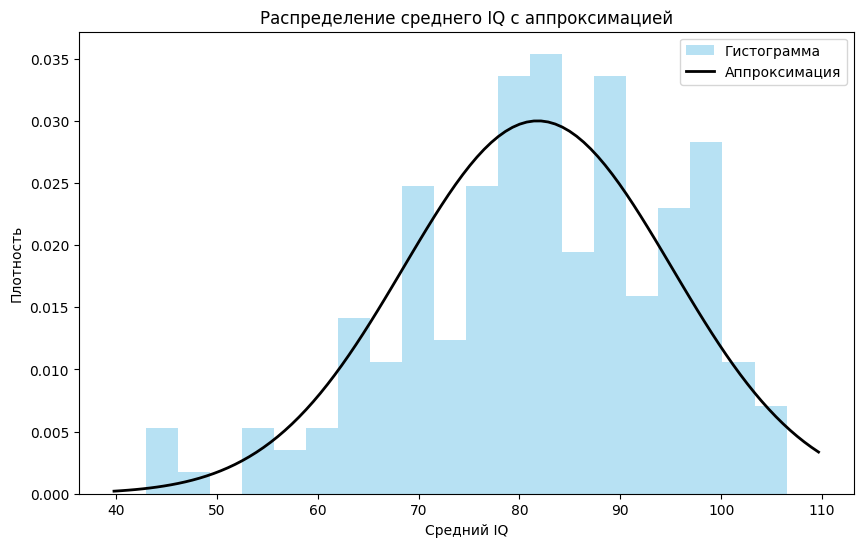

In [14]:
from scipy import stats

plt.figure(figsize=(10, 6))
plt.hist(df_clean['Average IQ'], bins=20, density=True, alpha=0.6, color='skyblue', label='Гистограмма')

# Добавление линии аппроксимации
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, df_clean['Average IQ'].mean(), df_clean['Average IQ'].std())
plt.plot(x, p, 'k', linewidth=2, label='Аппроксимация')

plt.title('Распределение среднего IQ с аппроксимацией')
plt.xlabel('Средний IQ')
plt.ylabel('Плотность')
plt.legend()
plt.show()


**Можно утверждать, что целевая переменная (Average IQ) нормально распределена, это может указывать на наличие линейных взаимосвязей с другими переменными. Проверим коррекляцию с остальными признаками.**

In [17]:
correlation = df[['Average IQ', 'Literacy Rate', 'Nobel Prices', 'Human Development Index', 'Mean years of schooling', 'Gross National Income', 'Population']].corr()
correlation

,Average IQ,Literacy Rate,Nobel Prices,Human Development Index,Mean years of schooling,Gross National Income,Population
Average IQ,1.000000,0.633420,0.208158,0.752697,0.703061,0.655038,0.069516
Literacy Rate,0.633420,1.000000,0.119988,0.815710,0.831448,0.528651,-0.042233
Nobel Prices,0.208158,0.119988,1.000000,0.233678,0.235929,0.304715,0.166642
Human Development Index,0.752697,0.815710,0.233678,1.000000,0.914243,0.826817,-0.026296
Mean years of schooling,0.703061,0.831448,0.235929,0.914243,1.000000,0.695712,-0.069631
Gross National Income,0.655038,0.528651,0.304715,0.826817,0.695712,1.000000,-0.048684
Population,0.069516,-0.042233,0.166642,-0.026296,-0.069631,-0.048684,1.000000


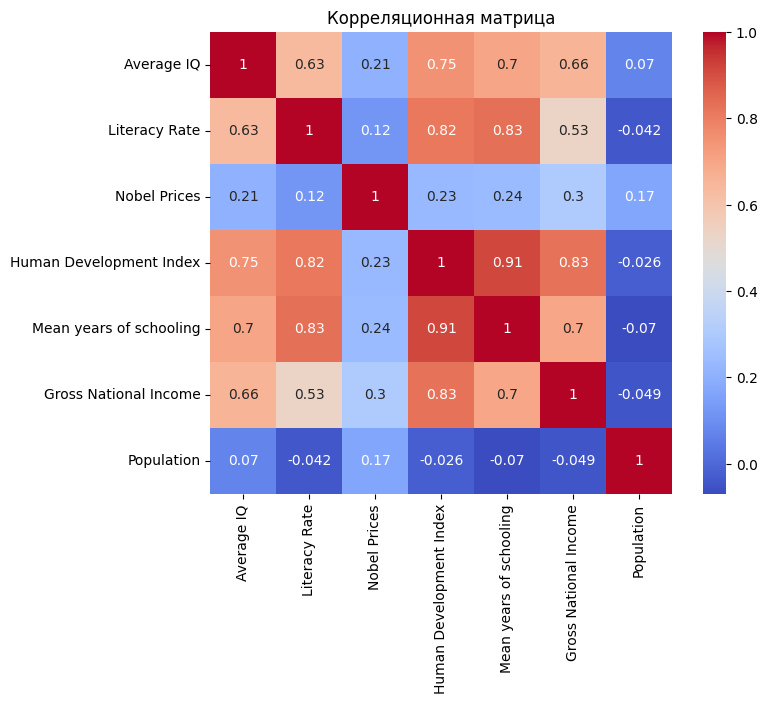

In [18]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', square=True)
plt.title('Корреляционная матрица')
plt.show()

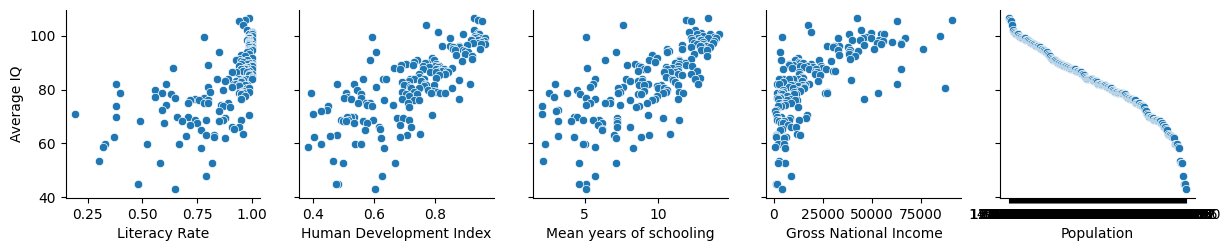

In [21]:
sns.pairplot(df_clean, x_vars=['Literacy Rate', 'Human Development Index', 'Mean years of schooling', 'Gross National Income', 'Population'], y_vars='Average IQ')
plt.show()

* **Между целевой переменной Average IQ и показателем Nobel Prices слабая корреляционная зависимость.**

* **Наибольшая корреляция целевой переменной с Human Development Index и Men years of schooling - c увеличением количества средних лет в школе увеличивается среднее IQ**

Рассмотрим отдельно корреляцию с признаком Population

In [29]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     178 non-null    object 
 1   Country                  178 non-null    object 
 2   Average IQ               178 non-null    float64
 3   Continent                178 non-null    object 
 4   Literacy Rate            178 non-null    float64
 5   Nobel Prices             178 non-null    float64
 6   Human Development Index  178 non-null    float64
 7   Mean years of schooling  178 non-null    float64
 8   Gross National Income    178 non-null    float64
 9   Population               178 non-null    object 
dtypes: float64(6), object(4)
memory usage: 14.0+ KB


**Признак Population имеет тип object. Нужно привести к типу float и построить график.**

In [32]:
import plotly as py
import plotly.io as pio
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

df_population = df_clean[['Population', 'Average IQ']]
df_population['Population'] = df_population['Population'].astype('float64')
df_population_sort = df_population.sort_values('Population', ascending=True)
print(df_population_sort)
fig = px.scatter(df_population_sort, x='Population', y='Average IQ', title='Зависимость среднего IQ от популяции')
fig.show()

       Population  Average IQ
81   4.199600e+01       83.96
156  7.316100e+01       66.03
32   7.696500e+01       95.20
139  9.429800e+01       70.48
159  1.036990e+02       63.42
..            ...         ...
104  2.404857e+08       80.00
114  2.775341e+08       78.49
23   3.399966e+08       97.43
3    1.425671e+09      104.10
125  1.428628e+09       76.24

[178 rows x 2 columns]


<ipython-input-32-f5e0872f40be>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**Корреляция между популяцией и IQ слабая, с увеличением полпуляции IQ не увеличивается. Более того, имеются выбросы в данных.**

**Рассмотрим связь между континентом и средним IQ**

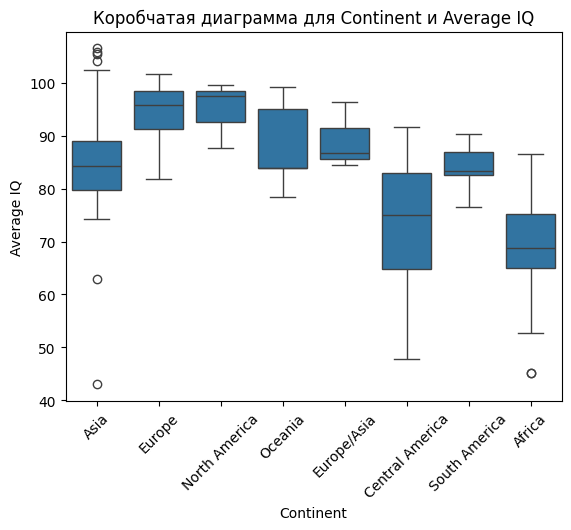

In [35]:
sns.boxplot(x='Continent', y='Average IQ', data=df_clean)
plt.title('Коробчатая диаграмма для Continent и Average IQ')
plt.xticks(rotation=45)
plt.show()

**Наибольший средний IQ в Северной Америке, наименьший - в Африке. Видим, что существует взаимосвязь между континетом и IQ.**

**Выводы:**

1.   Целевой признак (среднее  IQ) имеет нормальное распределение
2.   С увеличением количества средних лет в школе увеличивается среднее IQ
3.   Наблюдается взаимосвязь между континентами и средним IQ
4.   Наличие Нобелевской премии не означает высокий средний IQ в стране



#Задача 3.
Для выполнения работы будет использован csv файл “shopping_habits”, содержащий данные о различных покупках, которые совершаются покупателями в разных штатах США. Каждое из наблюдений в файле имеет следующие характеристики:
* Customer ID – порядковый номер строки в таблице
* Age – возраст покупателя
* Gender – пол покупателя
* Item Purchased – приобретенный товар
* Category - категория
* Purchase Amount (USD) – сумма покупки (в долларах)
* Location – локация покупки
* Size – размер (одежды)
* Color – цвет
* Season – время года совершения покупки
* Review Rating – полученный в отзыве рейтинг
* Subscription Status – статус подписки покупателя
* Shipping Type – тип доставки
* Discount Applied – применена ли скидка
* Promo Code Used – применен ли промокод
* Previous Purchases – были ли у данного покупателя предыдущие покупки
* Payment Method – способ оплаты
* Frequency of Purchases – частота покупок.

**Задание:** проведи разведочный анализ данных, выяви обычные взаимосвязи между значениями столбцов таблицы, выполни визуализацию, сделай выводы.

In [36]:
uploaded = files.upload()

Saving shopping_habits.csv to shopping_habits.csv


In [37]:
df = pd.read_csv('shopping_habits.csv')
df.head(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [39]:
df['Item Purchased'].value_counts()

,count
Item Purchased,
Blouse,171
Pants,171
Jewelry,171
Shirt,169
Dress,166
Sweater,164
Jacket,163
Coat,161
Sunglasses,161


**Рассмотрим сумму продаж товаров для мужчин и женщин отдельно.**

In [44]:
df_male = df[df['Gender'] == 'Male'].groupby('Item Purchased')['Purchase Amount (USD)'].sum().reset_index()

fig = go.Figure()


fig.add_trace(go.Bar(x=df_male['Item Purchased'], y=df_male['Purchase Amount (USD)'], marker_color='blue'))

fig.update_layout(
        title='Сумма продаж товаров для мужчин',  # Название графика
        xaxis_title='Товар',  # Название оси X
        yaxis_title='Сумма продаж',  # Название оси Y
        showlegend=False
)

fig.show()

df_female = df[df['Gender'] == 'Female'].groupby('Item Purchased')['Purchase Amount (USD)'].sum().reset_index()

fig = go.Figure()


fig.add_trace(go.Bar(x=df_male['Item Purchased'], y=df_male['Purchase Amount (USD)'], marker_color='blue'))

fig.update_layout(
        title='Сумма продаж товаров для женщин',  # Название графика
        xaxis_title='Товар',  # Название оси X
        yaxis_title='Сумма продаж',  # Название оси Y
        showlegend=False
)

fig.show()

**Распределение продаж для мужчин и женщин в целом равномерное со значением ~ 6500.**

In [49]:
males = df.groupby('Gender')['Customer ID'].count()

labels = ['Males', 'Females']
sizes = [males.loc['Male'], males.loc['Female']]

# Создание диаграммы
fig2 = go.Figure(data=[go.Pie(labels=labels, values=sizes)])
# Добавление заголовка
fig2.update_layout(title_text='Соотношение мужчин и женщин')


fig2.show()

**Женщин меньше, чем мужчин, но сумма продаж товаров примерно одинаковая. Значит женщины совершают покупок больше мужчин.**

In [52]:
df_season = df.groupby('Season')['Purchase Amount (USD)'].sum().reset_index()

fig = go.Figure()

fig = px.line(df_season, x='Season', y='Purchase Amount (USD)', title='Сумма продаж товаров в разное время года')
fig.show()


**Видимо, наибольшее количество покупок приходится на осень, наименьшее - на лето. Логично, потому что летом нужно меньше одежды.**

**Просмотрим, что покупают в разное время года.**

In [56]:
df['Season'].value_counts()

,count
Season,
Spring,999
Fall,975
Winter,971
Summer,955


In [57]:
df_items_summ = df[df['Season'] == 'Summer'].groupby('Category')['Purchase Amount (USD)'].sum().reset_index()
df_items_winter = df[df['Season'] == 'Winter'].groupby('Category')['Purchase Amount (USD)'].sum().reset_index()
df_items_spring = df[df['Season'] == 'Spring'].groupby('Category')['Purchase Amount (USD)'].sum().reset_index()
df_items_autm = df[df['Season'] == 'Fall'].groupby('Category')['Purchase Amount (USD)'].sum().reset_index()

fig = go.Figure()

# Добавление линий для каждого сезона
fig.add_trace(go.Scatter(x=df_items_summ['Category'], y=df_items_summ['Purchase Amount (USD)'],
                         mode='lines+markers', name='Лето'))

fig.add_trace(go.Scatter(x=df_items_winter['Category'], y=df_items_winter['Purchase Amount (USD)'],
                         mode='lines+markers', name='Зима'))

fig.add_trace(go.Scatter(x=df_items_spring['Category'], y=df_items_spring['Purchase Amount (USD)'],
                         mode='lines+markers', name='Весна'))

fig.add_trace(go.Scatter(x=df_items_autm['Category'], y=df_items_autm['Purchase Amount (USD)'],
                         mode='lines+markers', name='Осень'))

# Настройка заголовка и меток
fig.update_layout(title='Сумма продаж товаров по сезонам',
                  xaxis_title='Категории',
                  yaxis_title='Сумма покупок (USD)',
                  legend_title='Сезоны')

# Отображение графика
fig.show()

**Данный график подтверждает вывод: летом меньше всего покупок, потому что летом нужно меньше одежды. Относительно всех сезонов меньше всего покупают верхнюю одежду.**

In [59]:
df_methods = df.groupby('Payment Method')['Purchase Amount (USD)'].sum().reset_index()

fig = go.Figure()


fig.add_trace(go.Scatter(x=df_methods['Payment Method'], y=df_methods['Purchase Amount (USD)'],
                         mode='lines+markers'))

fig.update_layout(
        title='Сумма продаж товаров для различныых методов оплаты',  # Название графика
        xaxis_title='Метод',  # Название оси X
        yaxis_title='Сумма продаж',  # Название оси Y
        showlegend=False
)

fig.show()

**Больше всего платят кредитными картами, меньше всего используют метод оплаты Bank Transfer.**

**Выводы:**

1.   Женщины совершают покупки больше мужчин.
2.   Летом меньше всего покупок в общем (летом нужно меньше одежды).
3.   Кредитные карты - самый распортраненный метод оплаты.

